<a href="https://colab.research.google.com/github/sahil161102/Pnemothorax_dataset/blob/main/Pneumothorax_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Data

**Image Dataset Directory Structur**e:

**Note: The directory and sub-directory names shown here are only for explanation purposes which might differ from the code.**

Suppose if we have a master directory(folder) of the Images then we can subdivide it into “Training”, “Validation” & “Testing” images sub-directories(sub-folder).

And then the “Training” directories contain sub-directories(sub-folders) called “Infected” and “Uninfected” which contain appropriate images in the respective sub-directories.

Similarly, the “Validation'' & “Testing” directory also contains sub-directories(sub-folders) called “Infected” and “Uninfected” which contain appropriate images in the respective sub-directories.


**Training**: Images in this directory will be used for the training of the data.

**Validation**: Images in this directory will be used to validate the model training. The validation dataset allows us to see how well the data generalises the classification.

**Testing**: Images in this directory will be used to test how well the model is trained.
<img src="https://s3-whjr-curriculum-uploads.whjr.online/2467514a-e93f-4a0f-8e20-b3893dfa9144.jpeg" width= 600>



In [ ]:
!git clone https://github.com/procodingclass/PRO-M3-Pneumothorax-Image-Dataset

Cloning into 'PRO-M3-Pneumothorax-Image-Dataset'...
remote: Enumerating objects: 313, done.
remote: Counting objects: 100% (300/300), done.
remote: Compressing objects: 100% (297/297), done.
remote: Total 313 (delta 3), reused 300 (delta 3), pack-reused 13
Receiving objects: 100% (313/313), 118.60 MiB | 31.32 MiB/s, done.
Resolving deltas: 100% (3/3), done.
Updating files: 100% (602/602), done.


## Image Data Preprocessing:
1. Convert each image to an array
2. Map each image labels
3. Augment the each image

### Image Preprocessing: Mapping each image with labels

<center><b>Mapping Each Image With Labels</b><br><img src="https://s3-whjr-curriculum-uploads.whjr.online/1bdade80-2a32-4fc2-8902-f18067803dba.jpeg" width= 1000>

### Image Preprocessing: Data Augmentation

A few Data Augemtation Techniques:

*   Image Rotation
*   Image Height & Width Shift
*   Image Horizontal & Vertical Flipping
*   Image Resizing
*   Image Zooming


<img src="https://s3-whjr-curriculum-uploads.whjr.online/5403e9b1-a339-405d-98b3-36826ec3f04a.gif" width= 400>











#### Training Data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img


# Random Data Augmentation(Rescale, Rotation, Flips, Zoom, Shifts) using ImageDataGenerator
training_data_generator = ImageDataGenerator(
    rescale = 1.0/255,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest')


# Image Directory
training_image_directory = "/content/PRO-M3-Pneumothorax-Image-Dataset/training_dataset"

# Generate Preprocessed Augmented Data
training_augmented_images = training_data_generator.flow_from_directory(
    training_image_directory,
    target_size=(180,180))

Found 200 images belonging to 2 classes.


#### Validation Data

In [ ]:
# Random Data Augmentation(Rescale) using ImageDataGenerator
validation_data_generator = ImageDataGenerator(rescale = 1.0/255)

# Image Directory
validation_image_directory = "/content/PRO-M3-Pneumothorax-Image-Dataset/validation_dataset"

# Generate Preprocessed Augmented Data
validation_augmented_images = validation_data_generator.flow_from_directory(
    validation_image_directory,
    target_size=(180,180))

Found 200 images belonging to 2 classes.


#### Class Labels

In [ ]:
training_augmented_images.class_indices

{'infected': 0, 'uninfected': 1}

## Convolutional Neural Network Architecture
A CNN model have:

1. **Feature Learning layers**:

   1.1 Convolution + Activation(RELU) layers

   1.2 Pooling layers

2. **Classification layers**:

   2.1 Flatten layer

   2.2 Fully connected(Dense) layer

   2.3 Fully connected(Dense) layer with Softmax




<img src="https://s3-whjr-curriculum-uploads.whjr.online/9d09af47-3a9d-48b7-a05c-8941009442ea.png" width= 1500>


**Feature Extraction Visualisation(Convolution + Relu)**

The convolution is a mathematical computation between two arrays, the image array and the filter array which gives a new image array.


Visually we can understand that the feature detector/filter moves over the image to extract features from the image.



[<img src="https://s3-whjr-curriculum-uploads.whjr.online/3917c089-1d8f-4f32-b5c4-401b6abe8d47.gif" width= 500>](https://)


## Mathematically:

**Conv2D Layer**

The convolution is a mathematical computation between two 2D arrays, the image array and the filter array which gives a new image array.

A portion of the input image array matrix, called a sub-array(size same as the size of the filter) is taken, starting from the top left.

This sub-array is multiplied with the filter array. We can multiply one array matrix to another, by multiplying 1st element to 1st element of both the arrays(2nd element to 2nd element of both arrays and so on).

After multiplying the result is added, which gives the value of the 1st element of the new image array.

Then we shift towards right by one column, repeat the above steps to get the value of the 2nd element of the new array.

Once the whole row is finished we shift downwards by one row, repeat the above steps to get the value of all elements of the new array one by one.

The whole process is repeated with different filters, to get different output, which all together is the output of the 1st Conv2D layer.

These outputs from the 1st Conv2D layer are given to the 2nd Conv2D layer and convolutions are performed.

This repeated for all the layers of the CNN model.


<img src="https://s3-whjr-curriculum-uploads.whjr.online/306591ba-2163-45d9-9c60-dbc895332982.gif" width= 800>


**ReLU**

ReLU is defined as a function, y= f(x) such that it gives x for all values of x > 0 and 0 for all values of x<0.

<img src="https://s3-whjr-curriculum-uploads.whjr.online/6986c680-7ad3-4fad-bf04-59cecfa5e0e3.png" width= 600>


**MaxPooling2D**

First there is an input array(for example 4x4) and pool size(for example 2x2). Pool size is always smaller than the input array size.

Then the maximum value is taken from the sub-array of size equal to pool size.

The result after applying the Max Pooling will be the new array of size equal to the half of the size of the original input array.

Since our input array is 4x4, after max pooling the new array will be 2x2, hence reducing the dimension of the array.


<img src="https://s3-whjr-curriculum-uploads.whjr.online/d485cb40-4db6-4fb6-9051-d9e888883053.jpg" width= 800>



## Define/Build Convolution Neural Network

In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential([

    # 1st Convolution & Pooling layer
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(180, 180, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    # 2nd Convolution & Pooling layer
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # 3rd Convolution & Pooling layer
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # 4th Convolution & Pooling layer
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Flatten the results to feed into a Dense Layer
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),

    # Classification Layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

## Model Summary

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 20, 20, 128)       0

## Visualize convolutional layers intermediate ouputs


This visual shows how the features are extracted layer after layer in **4** **convolutional layers** (conv2d, conv2d_1, conv2d_2, conv2d_3) with **max pooling layers**(max_pooling2d, max_pooling2d_1, max_pooling2d_2, max_pooling2d_3)

**Note: This visual is created only for explanation purposes.**

At the start of a convolutional network, the filter(feature detector/kernel) detects simple patterns, like horizontal lines, vertical lines, and corners, simple shapes.

In later layers of the network, filters(feature detector/kernel) are complex that detect shapes, objects, and other complex structures, which is done by using the previously generated feature and their detected simple features is used to build more complex ones.


*Note: As we go deeper in the layers, the feature becomes increasingly complex hence less visually interpretable. They begin to encode higher-level concepts such as single borders, corners and angles. Higher presentations carry increasingly less information about the visual contents of the image, and increasingly more information related to the class of the image, this why the outputs of the Dense Layer will not be shown for visual explanation.*



<img src="https://s3-whjr-curriculum-uploads.whjr.online/b941c8bd-c137-449f-ae8f-7233735a7845.jpg" width= 1200>



## Compile Model

Before training the model we need to compile it. We compile the model using the **compile()** method(Keras).

The compile method takes many arguments, but we will pass the three arguments which must be specified. The arguments are:

1. Optimizers

2. Loss function

3. Metrics for prediction


<img src="https://s3-whjr-curriculum-uploads.whjr.online/239bdfe5-057d-41ae-86a9-a73ce92c9998.png" width= 500>

**Need of Model Compilation:**

When the model is trained it can, almost never, be 100% efficient, that it cannot always predict the class of the image correctly.

This leads to the concept of loss during model training, which tells us how bad the model is performing.

Hence we need to use the loss functions(these are mathematical computation functions) to get the value of the loss.

For example, the result of the loss function gives the value as 0.45, this means that 45 %(0.45X100) of the times, the model will predict wrong results, and only 55% times will predict the correct results!

That means, we should try to minimize the loss function value, because a lower loss value means our model is going to perform better. The process of minimizing (or maximizing) the value of a mathematical function/expression is called optimization.

<br><img src="https://s3-whjr-curriculum-uploads.whjr.online/655fb95e-40b3-4bc1-988b-21ba782bf54d.png" width= 400>


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Fit & Save Model

In [ ]:
history = model.fit(training_augmented_images, epochs=20, validation_data = validation_augmented_images, verbose=True)

model.save("Pneumothorax.h5")

Epoch 1/20
7/7 [==============================] - 31s 4s/step - loss: 0.7295 - accuracy: 0.4300 - val_loss: 0.6925 - val_accuracy: 0.5000
Epoch 2/20
7/7 [==============================] - 29s 4s/step - loss: 0.6981 - accuracy: 0.4300 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 3/20
7/7 [==============================] - 28s 4s/step - loss: 0.6937 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/20
7/7 [==============================] - 28s 4s/step - loss: 0.6950 - accuracy: 0.4950 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 5/20
7/7 [==============================] - 29s 4s/step - loss: 0.6934 - accuracy: 0.4600 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/20
7/7 [==============================] - 28s 4s/step - loss: 0.6930 - accuracy: 0.5600 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/20
7/7 [==============================] - 28s 4s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 8/20
7/7 [==================

## Running/Testing the Model
 #### Predict the Class of an Unseen Image

In [ ]:
training_augmented_images.class_indices

{'infected': 0, 'uninfected': 1}

In [ ]:
import os
import numpy as np

from matplotlib import pyplot
from matplotlib.image import imread

import tensorflow
from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.preprocessing.image import img_to_array

# Testing image directory
testing_image_directory = '/content/PRO-M3-Pneumothorax-Image-Dataset/testing_dataset/infected'

# All image files in the directory
img_files = os.listdir(testing_image_directory)

i= 0

# Loop through an 9 image files
for file in img_files[1:60]:

  # full path of the image
  img_files_path = os.path.join(testing_image_directory, file)

  # load image
  img_1 = load_img(img_files_path,target_size=(180, 180))

  # convert image to an array
  img_2 = img_to_array(img_1)

  # increase the dimension
  img_3 = np.expand_dims(img_2, axis=0)

  # predict the class of an unseen image
  prediction = model.predict(img_3)
  # print(prediction)

  predict_class = np.argmax(prediction, axis=1)
  # print(predict_class)

  # plot the image using subplot
  pyplot.subplot(3, 3, i+1)
  pyplot.imshow(img_2.astype('uint8'))

  # Add title of the plot as predicted class value
  pyplot.title(predict_class[0])

  # Do not show x and y axis with the image
  pyplot.axis('off')

  i=i+1

pyplot.show()

FileNotFoundError: ignored

## Additional Activity

## Accuracy Curve

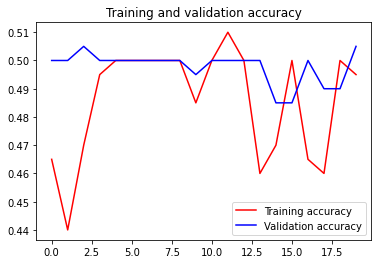

In [ ]:
from matplotlib import pyplot

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# print(acc)
# print(val_acc)

epochs = range(len(acc))

pyplot.plot(epochs, acc, 'r', label='Training accuracy')
pyplot.plot(epochs, val_acc, 'b', label='Validation accuracy')

pyplot.title('Training and validation accuracy')

pyplot.legend()

pyplot.show()